In [1]:
# 데이터 전처리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['class'] = wine_load.target
wine['class'] = wine['class'].map({0:'class_0', 1:'cblass_1', 2:'class_2'})
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [2]:
wine.sort_values(by='color_intensity')  # 정랠해 보면 잘 안보일 수 있다.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0,cblass_1
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0,cblass_1
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,cblass_1
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,cblass_1
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,cblass_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0,class_2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,class_2
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,class_2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,class_2


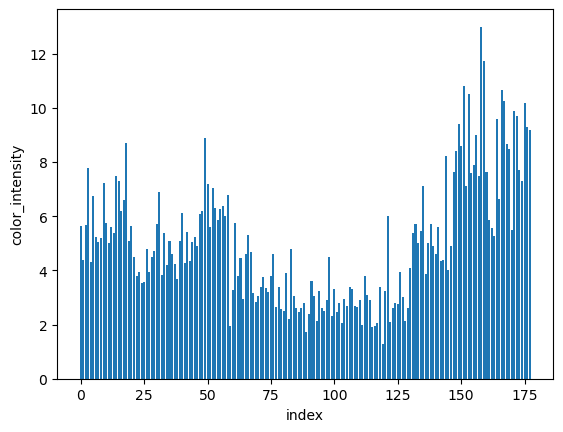

In [3]:
plt.bar(wine.index, wine['color_intensity'])
plt.xlabel('index'); plt.ylabel('color_intensity')
plt.show()

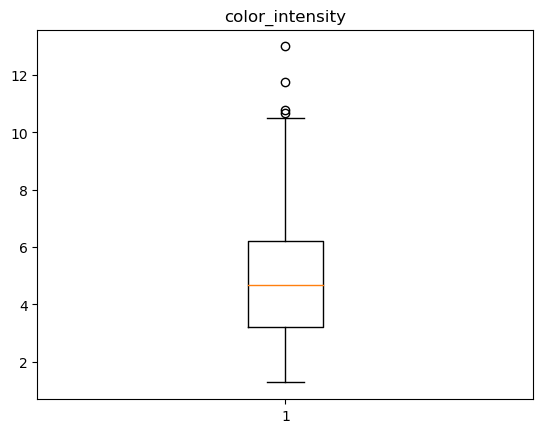

In [4]:
plt.boxplot(wine['color_intensity'])  # 이상치를 시각화하여 확인
plt.title('color_intensity')
plt.show()

In [5]:
def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr =  quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr*1.5)
    upper_whis = quartile_3 + (iqr*1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers  # outlier를 인덱스와 함께 표시

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


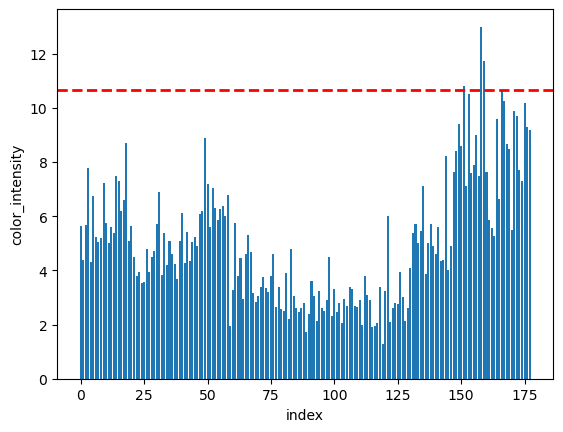

In [6]:
plt.bar(wine.index, wine['color_intensity'])
plt.xlabel('index')
plt.ylabel('color_intensity')
plt.axhline(y=min(outliers['color_intensity']), color='red', linewidth=2, linestyle='--')
plt.show()

In [7]:
min(outliers['color_intensity'])

10.68

In [8]:
# 이상치 정제
# 이상치 제거
drop_outliers = wine.drop(index=outliers.index)

# 이상치를 삭제하기 전과 후의 데이터 shape
print("Original :", wine.shape)
print("Drop outliers :", drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [9]:
# 이상치 대체
# 이상치를 Null로 만든다음 결측치와 함께 대체
# wine데이터세트의 'color_intensity' 컬럼의 이상치를 평균값으로 대체
wine.loc[outliers.index, 'color_intensity'] = np.NaN
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [10]:
# 범주형 변수 처리
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [11]:
iris_dummy= pd.get_dummies(iris, columns=['class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_Setosa,class_Versicolour,class_Virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [12]:
# 데이터 분할
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(arrays,
                                                    test_size=None,     # 테스트 사이즈 비율
                                                    train_size=None,
                                                    random_state=None,  # 임의의 번호지정, 같은 숫자를 사용하면 같은 출력
                                                    shuffle=True,       # 추철전에 데이터 섞음, False이면 섞지 않음
                                                    stratify=None)      # None이 아닌 경우 지정한 변수 기준으로 계층화되어 변수 비율 유지하여 추철
                                                    
'''


'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(arrays,\n                                                    test_size=None,     # 테스트 사이즈 비율\n                                                    train_size=None,\n                                                    random_state=None,  # 임의의 번호지정, 같은 숫자를 사용하면 같은 출력\n                                                    shuffle=True,       # 추철전에 데이터 섞음, False이면 섞지 않음\n                                                    stratify=None)      # None이 아닌 경우 지정한 변수 기준으로 계층화되어 변수 비율 유지하여 추철\n                                                    \n'

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris=load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='class'), iris['class'], test_size=0.2, random_state=1004)
# 테스트는 2개 행을 이용하겠다.
print('X_train :', X_train.shape, ' X_test :', X_test.shape)
print('y_train :', y_train.shape, ' y_test :', y_test.shape)

X_train : (120, 4)  X_test : (30, 4)
y_train : (120,)  y_test : (30,)


In [31]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
131,7.9,3.8,6.4,2.0
74,6.4,2.9,4.3,1.3
63,6.1,2.9,4.7,1.4
...,...,...,...,...
14,5.8,4.0,1.2,0.2
69,5.6,2.5,3.9,1.1
31,5.4,3.4,1.5,0.4
11,4.8,3.4,1.6,0.2


In [32]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
94,5.6,2.7,4.2,1.3
54,6.5,2.8,4.6,1.5
76,6.8,2.8,4.8,1.4
59,5.2,2.7,3.9,1.4
5,5.4,3.9,1.7,0.4
8,4.4,2.9,1.4,0.2
117,7.7,3.8,6.7,2.2
25,5.0,3.0,1.6,0.2
84,5.4,3.0,4.5,1.5
132,6.4,2.8,5.6,2.2


In [17]:
y_train

76     Versicolour
59     Versicolour
5           Setosa
8           Setosa
117      Virginica
          ...     
14          Setosa
69     Versicolour
31          Setosa
11          Setosa
2           Setosa
Name: class, Length: 148, dtype: object

In [27]:
# train_test_split()은 무작위 임의추출이지만 random_state에 임의의 수를 넣으면 다음번에 같은 결과를 얻을 수 있다.
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='class'), iris['class'], test_size=0.2)
X_train, X_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 61                 5.9               3.0                4.2               1.5
 144                6.7               3.3                5.7               2.5
 21                 5.1               3.7                1.5               0.4
 39                 5.1               3.4                1.5               0.2
 0                  5.1               3.5                1.4               0.2
 ..                 ...               ...                ...               ...
 10                 5.4               3.7                1.5               0.2
 97                 6.2               2.9                4.3               1.3
 104                6.5               3.0                5.8               2.2
 100                6.3               3.3                6.0               2.5
 109                7.2               3.6                6.1               2.5
 
 [120 rows x 4 columns],
      sepal length (cm)  

In [28]:
# random_state를 안 넣고 다시 돌려보자.
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='class'), iris['class'], test_size=0.2)
X_train, X_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 118                7.7               2.6                6.9               2.3
 54                 6.5               2.8                4.6               1.5
 69                 5.6               2.5                3.9               1.1
 1                  4.9               3.0                1.4               0.2
 12                 4.8               3.0                1.4               0.1
 ..                 ...               ...                ...               ...
 8                  4.4               2.9                1.4               0.2
 106                4.9               2.5                4.5               1.7
 110                6.5               3.2                5.1               2.0
 64                 5.6               2.9                3.6               1.3
 28                 5.2               3.4                1.4               0.2
 
 [120 rows x 4 columns],
      sepal length (cm)  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='class'), iris['class'], test_size=0.2, random_state=1004)
# 아까 지정한 random_state를 다시 동일값으로 지정
X_train, X_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 87                 6.3               2.3                4.4               1.3
 67                 5.8               2.7                4.1               1.0
 131                7.9               3.8                6.4               2.0
 74                 6.4               2.9                4.3               1.3
 63                 6.1               2.9                4.7               1.4
 ..                 ...               ...                ...               ...
 14                 5.8               4.0                1.2               0.2
 69                 5.6               2.5                3.9               1.1
 31                 5.4               3.4                1.5               0.4
 11                 4.8               3.4                1.6               0.2
 2                  4.7               3.2                1.3               0.2
 
 [120 rows x 4 columns],
      sepal length (cm)  

In [23]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
iris['class'].value_counts()

class
Setosa         50
Versicolour    50
Virginica      50
Name: count, dtype: int64

In [26]:
y_train.value_counts()

class
Setosa         50
Virginica      50
Versicolour    48
Name: count, dtype: int64

In [34]:
# stratify 인자를 넣어 층화임의추출 수행
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='class'), iris['class'], test_size=0.2, stratify=iris['class'])
print('X_train :', X_train.shape, ' X_test :', X_test.shape)
print('y_train :', y_train.shape, ' y_test :', y_test.shape)

X_train : (120, 4)  X_test : (30, 4)
y_train : (120,)  y_test : (30,)


In [36]:
y_train.value_counts()  # 대충 비슷한 비율로 나뉘어 있음

class
Versicolour    41
Setosa         40
Virginica      39
Name: count, dtype: int64

In [37]:
y_test.value_counts()

class
Virginica      11
Setosa         10
Versicolour     9
Name: count, dtype: int64

In [50]:
# 데이터 스케일링 : 모든 컬럼의 값 범위를 같게 만들어주는 과정
# 표준화(standardization)은 각 컬럼의 평균을 0, 분산을 1의 정규분포로 만들어줌
# 정규화(normalization)은 각 컬럼들의 값이 특정범위(주로 0~1)에 들어가도록 함

# Standard Scaler
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)
X_test_sc = StdScaler.transform(X_test)


# 결과확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled  (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.36, 3.02) (0.00, 1.00)
Test_scaled  (-1.79, 2.33) (0.08, 1.03)


In [51]:
# Min-max scaler : 0과 1사이의 값으로 스케일링
from sklearn.preprocessing import MinMaxScaler
MmScaler = MinMaxScaler()
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)
X_test_sc = MmScaler.transform(X_test)

# 결과확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled  (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.44, 0.26)
Test_scaled  (0.03, 0.97) (0.46, 0.27)


In [52]:
# Mas Abs Scaler : 최대절댓값과 0이 각각 1, 0이 되도록 스케일링, 모든 값은 -1 ~ 1이고 데이터가 양수이면 Min-max scaler와 동일
from sklearn.preprocessing import MaxAbsScaler
MaScaler = MaxAbsScaler()
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)
X_test_sc = MaScaler.transform(X_test)

# 결과확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled  (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))


		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.61, 0.24)
Test_scaled  (0.08, 0.97) (0.63, 0.24)


In [53]:
# Robust Scaler : 평균과 분산대신 중앙값과 사분위값을 활용, IQR을 이용하여 이상치에 덜 민감
from sklearn.preprocessing import RobustScaler
RuScaler = RobustScaler()
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)
X_test_sc = RuScaler.transform(X_test)

# 결과확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled  (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.00, 2.80) (-0.03, 0.65)
Test_scaled  (-1.40, 1.80) (0.02, 0.65)


In [56]:
# 원본 스케일로 변경

# 스케일링된 데이터 확인
pd.DataFrame(X_train_sc).head(3)

,0,1,2,3
0,0.384615,-1.4,0.028369,0.000000
1,0.000000,-0.6,-0.056738,-0.200000
2,1.615385,1.6,0.595745,0.466667


In [59]:
# 원본스케일로 변경
X_Original = RuScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_Original).head(3)

,0,1,2,3
0,6.3,2.3,4.4,1.3
1,5.8,2.7,4.1,1.0
2,7.9,3.8,6.4,2.0


In [62]:
# 주성분분석(Principle Component Analysis)

# 분석전에 이상치를 제거하고 스케일링 수행
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] =  iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

features = ['수치형 변수1', '수치형 변수2']
x=iris.drop(columns='class')

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [63]:
# 주성분 추출
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=int)  # n_components : 생성할 주성분의 개수
pca_fit = pca.fit(x)

print("고유값 : ", pca.singular_values_)
print("분산 설명력 : ", pca.explained_variance_ratio_)
'''

from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca_fit = pca.fit(x)

print("고유값 : ", pca.singular_values_)
print("분산 설명력 : ", pca.explained_variance_ratio_)

고유값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력 :  [0.72962445 0.22850762 0.03668922 0.00517871]


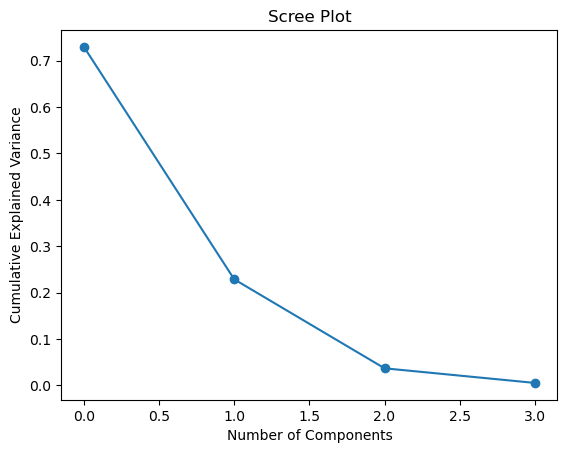

In [64]:
# scree plot으로 사용할 주성분의 개수 정하기
import matplotlib.pyplot as plt

plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

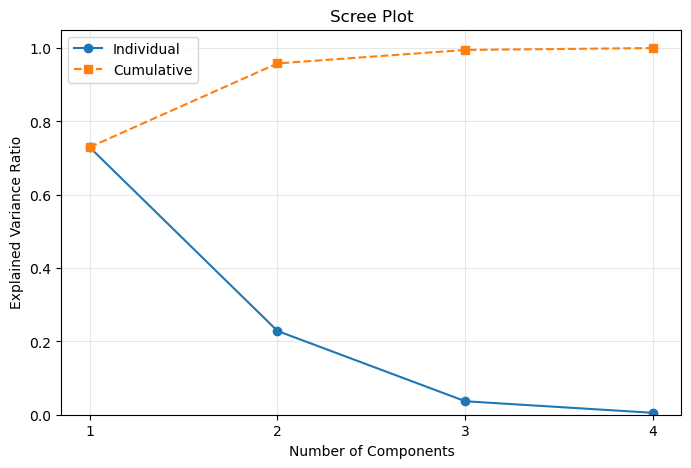

In [65]:
# 약간 개선한 버전

# 주성분 개수가 증가할수록 Scree Plot의 기울기는 감소, 플롯의 기울기가 급격히 감소하는 지점 직전까지 주성분으로 선택
import numpy as np
import matplotlib.pyplot as plt

var_ratio = pca.explained_variance_ratio_  # 각 주성분(PC1, PC2, …)이 전체 분산의 몇 %를 설명하는지 비율
cum_var = np.cumsum(var_ratio)  # 위 값을 앞에서부터 누적합
n_components = len(var_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), var_ratio, 'o-', label='Individual')
plt.plot(range(1, n_components + 1), cum_var, 's--', label='Cumulative')

plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, n_components + 1))
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [67]:
# 새로운 데이터프레임 확인
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principal_iris = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
principal_iris

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


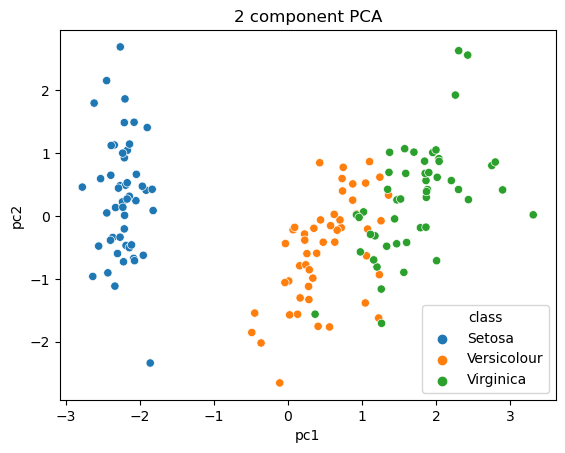

In [69]:
# 주성분 산포도 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("2 component PCA")
sns.scatterplot(x='pc1', y='pc2', hue=iris['class'], data=principal_iris)
plt.show() # 분류가 용이해진 것을 볼 수 있다.

In [90]:
# 언더샘플링 : 다수 레이블을 가진 데이터 숫자를 줄이는 방법

# 데이터 준비
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))
'''
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
make_classification : 가상 분류용 데이터셋을 만들어주는 함수

Counter : 레이블 개수를 세어주는 도구

RandomUnderSampler : 다수 클래스 샘플을 랜덤하게 줄여서 클래스 비율을 맞추는 언더샘플링 기법

x, y = make_classification(
    n_samples=2000,    # 전체 샘플 수 2000개
    n_features=6,      # 특성(열) 6개
    weights=[0.95],    # 클래스 0이 95%, 클래스 1이 5% 정도 되도록
    flip_y=0           # 라벨에 노이즈(뒤집기) 없음
)
weights=[0.95] 라고 쓰면
→ 이진분류에서 class 0 : 95%, class 1 : 5% 비율로 생성됩니다.
→ 즉 강하게 불균형한 데이터를 일부러 만드는 설정입니다.

python
코드 복사
print(Counter(y))
y 안에 있는 레이블(0, 1)이 각각 몇 개인지 출력합니다.
'''

Counter({0: 1900, 1: 100})


'\nimport numpy as np\nimport pandas as pd\nfrom sklearn.datasets import make_classification\nfrom collections import Counter\nfrom imblearn.under_sampling import RandomUnderSampler\nmake_classification : 가상 분류용 데이터셋을 만들어주는 함수\n\nCounter : 레이블 개수를 세어주는 도구\n\nRandomUnderSampler : 다수 클래스 샘플을 랜덤하게 줄여서 클래스 비율을 맞추는 언더샘플링 기법\n\nx, y = make_classification(\n    n_samples=2000,    # 전체 샘플 수 2000개\n    n_features=6,      # 특성(열) 6개\n    weights=[0.95],    # 클래스 0이 95%, 클래스 1이 5% 정도 되도록\n    flip_y=0           # 라벨에 노이즈(뒤집기) 없음\n)\nweights=[0.95] 라고 쓰면\n→ 이진분류에서 class 0 : 95%, class 1 : 5% 비율로 생성됩니다.\n→ 즉 강하게 불균형한 데이터를 일부러 만드는 설정입니다.\n\npython\n코드 복사\nprint(Counter(y))\ny 안에 있는 레이블(0, 1)이 각각 몇 개인지 출력합니다.\n'

In [91]:
# Random Under Sampling : 다수를 차지하는 레이블에서 무작위로 데이터를 제거
undersample = RandomUnderSampler(sampling_strategy='majority')  # majority는 소수데이터 갯수와 동일하게 줄임
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [92]:
undersample = RandomUnderSampler(sampling_strategy = 0.5)  # 0과 1사이를 지정하면 소수레이블 데이터수와 다수레이블 데이터수를 조정
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


In [93]:
# 오버 샘플링(Over Sapling) : 소수의 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비울을 맞추는 방법
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))


Counter({0: 1900, 1: 950})


In [94]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


In [95]:
# SMOTE(Synthetic Minority Over-sampling Technique) 
# 소수레이블을 지닌 데이터세트의 관측값에 대한 K개의 최근접이웃을 찾고 관측값과 이웃으로 선택된 값 사이에 
# 임의의 새로운 데이터를 생성하는 방법

from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))


Counter({0: 1900, 1: 1900})


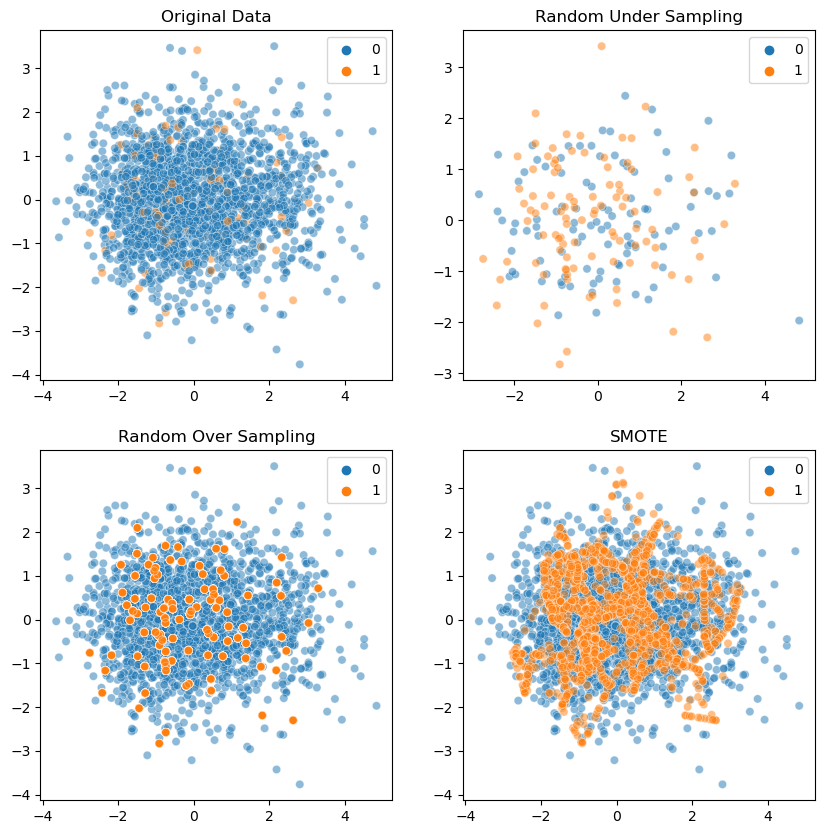

In [96]:
# 그림으로 직관적으로 확인
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.scatterplot(x = x[:, 1], y=x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_under[:, 1], y=x_under[:, 2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_over[:, 1], y=x_over[:, 2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_sm[:, 1], y=x_sm[:, 2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')
plt.show()